### 問題６まで考えながら解いて来たが、それ以降は、前期の増田さんや今期の佐藤さんのコードを模写しながら、リーディングしていった。

### 問９以降は何をしているかがまだ意味が分かっていない。

### その前までのは、自分で理解が追いつくものもあるが、途中途中でやっている内容の理解が追いついていない。それは自分用にも記しておく。

### 最終的にScratchKMeansbymasukazu_speedが分かるようになればいいと思う。

### ScratchKMenasbymasukazu_speedに、問題６までやっていたコードを入れて、シルエット図のメソッドは消したものをとりあえず現状の提出物にする(ScratchKMeansbymasukazu_speed_featmisaki)

- https://www.youtube.com/watch?v=8yptHd0JDlw　@youtube by ヨビノリ
- https://www.youtube.com/watch?v=8KhT_TCmLSw @youtube by いまにゅのプログラミング塾

最初この２つを見るのが理解としては早そう

- https://www.youtube.com/watch?v=V4PN2tjEqA8 @youtube by ウマたん

具体例等があまりないので、上２つを先に見たほうがまだ理解出来るかも。実質見なくてもいいとは思った。ウマたんはWebサイトの方がいいかも。

- https://www.youtube.com/watch?v=mmGj9qcFKAM @youtube by AbleProgramming

今回の課題とは関係ない(?)部分も多く、少し難しいかも

- https://diveintocode.slack.com/files/U71KZN0HL/F01N1PXLG94/sprint7____________________________k-means___.pdf @slack by西尾さん

- https://toukei-lab.com/k-means　@Webサイト byウマたん
- https://toukei-lab.com/%e3%82%af%e3%83%a9%e3%82%b9%e3%82%bf%e3%83%bc%e5%88%86%e6%9e%90　@Webサイト byウマたん

In [3]:
# import pandas as pd
# import numpy as np
# from sklearn.datasets import load_iris
# from sklearn.cluster import KMeans
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score

# iris = load_iris()
# df = pd.DataFrame(iris.data, columns=iris.feature_names)
# pred_cluster = KMeans(n_clusters=3).fit_predict(df)
# confusion_matrix(iris.target,pred_cluster)
# accuracy_score(iris.target,pred_cluster)

## 1.このSprintについて

### printの目的
- スクラッチを通してK-meansを理解する
- クラスタ分析を行う

### どのように学ぶか
スクラッチでK-meansを実装した後、それを使用しクラスタ分析を行います。



## 2.K-meansスクラッチ

K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchKMeansクラスにコードを書き加えていってください。


**《雛形》**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import *

### 前期の増田さん

In [132]:
class ScratchKMeansbymasukazu():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=2, n_init=20, max_iter=100, tol=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    
    def _remyu(self, X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:, -1]==j, :-1], axis=0)
            
    def _reclustering(self, X):
        for i in range(len(X)):
            dist_m =10**10
            for j in range(self.n_clusters):
                #クラスタリングしてるから、計算に入らないように(X[i, :-1])になってる
                dist = np.sqrt(np.sum((X[i, :-1]-self.myu[j])**2)) #ユークリッド
                
                if dist < dist_m:
                    dist_m = dist
                    X[i, -1] =j
    
    def _sse(self, X):
        self.best_sse = 10**10
        
        sse =0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i, -1]:
                    sse += np.sum((X[i, :-1]-self.myu[j])**2)
                    
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters    
    
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        #このfor文の中で周ってると思うこと
        for k in range(self.n_init):
            
            #初期設定クラスタ数分の中心点μkをセット
            self.myu = X[np.random.choice(len(X), size=self.n_clusters, replace =False)]
            
            
            cluster = np.zeros(len(X)) #クラスタ分けした値をセット
            X_cluster = np.concatenate([X, cluster.reshape(-1, 1)], axis=1) #先に0をラベリングしている
        
        for ite in range(self.max_iter):
            self._reclustering(X_cluster)
            
            old_myu = self.myu
            self._remyu(X_cluster)
            
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            
                for i in range(self.n_clusters):
                    plt.scatter(X[X_cluster[:, -1]==i, 0], X[X_cluster[:, -1]==i, 1], s=40)
                plt.scatter(self.myu[:, 0], self.myu[:, 1], s=80)
                plt.show()
                
            #イテレーションの継続判定
            if np.sum(old_myu-self.myu) <self.tol:
                self._sse(X_cluster)
                break
            self._sse(X_cluster)
        
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        y_pred = np.zeros(len(X))
        
        for i in range(len(X)):
            dist_m = 10**10
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
                
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i]=j
        return y_pred

In [143]:
class ScratchKMeansbymasukazu_speed():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=2, n_init=20, max_iter=100, tol=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    
    def _remyu(self, X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[self.cluster==j],  axis=0)
            
    def _reclustering(self, X):
        diff = (X-self.myu[:, None]).reshape(-1, 2)
        #ここの意味がよくわからん・・・
        self.dist = np.linalg.norm(diff, ord=2, axis =1).reshape(self.n_clusters, -1).T
        self.cluster = np.argmin(self.dist, axis =1)
    
    
    def _sse(self, X):
        diff = (X-self.myu[:, None]).reshape(-1, 2)
        #ここの意味がよくわからん・・・
        self.dist = np.linalg.norm(diff, ord =2, axis =1).reshape(self.n_clusters, -1).T
        sse = np.sum(np.min(self.dist, axis =1)**2)
        
        self.best_sse = 10**10            
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters
            self._silhouette(X) if self.n_clusters >=2 else _
    
    def _silhouette(self, X):
        ab = np.zeros([len(X), 2])
        
        self.silhouette_vals = np.zeros(len(X))
        
        for i, j in enumerate(X):
            ab[i, 0] = np.sum(np.linalg.norm(j-X[self.cluster == self.cluster[i]], ord =2, axis =1))/len(X[self.cluster == self.cluster[i]]-1)
            ab[i, 1] = np.mean(np.linalg.norm(j-X[self.cluster == self.dist[i].argsort()[1]], ord =2, axis =1))
            
            self.silhouette_vals[i]  = (ab[i, 1]-ab[i, 0])/np.max(ab[i])
        
        self.silhouette_avg = np.mean(self.silhouette_vals)
        self.y_km = self.cluster
        self.cluster_labels = np.unique(self.cluster)
    
    
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        #このfor文の中で周ってると思うこと
        for k in range(self.n_init):
            
            #初期設定クラスタ数分の中心点μkをセット
            self.myu = X[np.random.choice(len(X), size=self.n_clusters, replace =False)]
        
        for ite in range(self.max_iter):
            self._reclustering(X)
            
            old_myu = self.myu
            self._remyu(X)
            
            #verboseをTrueにした際は学習過程を出力
            if self.verbose:
                fig = plt.subplots(figsize =(10, 8))
                plt.rcParams["font.size"]=20
            
                for i in range(self.n_clusters):
                    plt.scatter(X[self.cluster==i, 0], X[self.cluster==i, 1], s=80)
                plt.scatter(self.myu[:, 0], self.myu[:, 1], s=100)
                plt.show()
                
            #イテレーションの継続判定
            if np.sum(old_myu-self.myu) <self.tol:
                self._sse(X)
                break
            self._sse(X)
        
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        diff = (X-self.record_myu[:, None]).reshape(-1, 2)
        dist = np.linalg.norm(diff, ord=2, axis =1).reshape(self.record_cluster, -1).T
        
        return np.argmin(dist, axis =1)

### 今期の佐藤さん

do_clusteringのところが収束しない

In [26]:
class ScratchKMeansbysatoko():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter =10):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        
        self.sse = 0
        self.center_points = [[]]
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        
        #【問題6】異なる初期値で計算
        #学習回数だけ繰り返す
        for i in range(self.n_init):
            
            #ランダムな初期値から学習を行い、新たなSSE・中心点を取得
            
            sse, center_points = self.learn(X)
            
            #初回またはSSEが最小の場合、値を保存
            if i == 0 or sse < self.sse:
                self.sse = sse
                self.center_points = center_points
                
    """"
    クラスタの割当、中心点の移動、SSEの算出を行い
    新しい中心点とSSEを返却する
    """
            
    def learn(self, X):
            
            #【問題１】中心点の初期値を決める(ランダム)
            center_points = self._get_center_points(X)
            
            #【問題3】クラスタへの割当
            X_with_labels = self._do_clustering(X, center_points)
            
            sse = 0
            
            #【問題5】繰り返し(sseが収束するまで繰り返す)
            i = 0
            while True:
                
                #【問題4】中心点の移動
                new_center_points = self._move_center_points(X_with_labels)
            
                #【問題3】クラスタへの割当
                X_with_labels = self._do_clustering(X, new_center_points)
                
                #【問題2】SSEを求める関数の作成
                new_sse = self._calc_sse(X_with_labels, new_center_points)
                
                #SSEの値が収束した場合はループを抜ける
                if sse == new_sse or i == self.max_iter:
                    break
                #上記以外の場合はループを続ける
                else:
                    center_points = new_center_points
                    sse = new_sse
                    i+= 1
            
            return new_sse, new_center_points

                
            
    def _get_center_points(self, X):
        
        center_points = [[]]
        
        #クラスタの数だけループ
        for i in range(self.n_clusters):
            #Xの中からランダムな値を中心点とし、リストに格納していく
            center_point =X[randint(0, len(X))]
            center_points = np.append(center_points, center_point)
            
        #後続処理のためリシェイプ
        center_points = center_points.reshape(self.n_clusters, X.shape[1])
        
        #shape(クラスタ数、特徴量)
        return center_points
        
        """"
        最も近い中心点にラベルを振り分けるメソッド
        """
    def _do_clustering(self, X, center_points):
            
        distances = np.zeros((len(X), len(center_points)))
            
            #中心点の個数だけループ
        for i in range(len(center_points)):
                
                #Xのサンプル数分ループ
            for j in range(len(X)):
                    
                    #中心点との差分を算出
                deff = center_points[i]-X[j]
                    
                    #原点から差分の距離を算出し、変数に格納していく
                distances[j][i] = np.linalg.norm(deff)
                print(distances[j][i])
            
            #それぞれの値から最も距離が短い中心点をその値のラベルとし、ラベルのリストを作成
        labels = np.argmin(distances, axis =1)
            
            #Xとラベルを結合
        X_with_label = np.hstack([X, labels[:, np.newaxis]])
            
            #shape(サンプル数、特徴量+1)
        return X_with_label
        
        """
        中心点を移動するメソッド
        """
    def _move_center_points(self, X_with_label):
            
        n_features =X_with_label.shape[1]-1
            
            #中心点
        center_points = np.zeros((self.n_clusters, n_features))
            
        all_labels = X_with_label[:, n_features]
            
            #クラス数の数だけループ 
        for i in range(self.n_clusters):
                
                #ラベル=iの行を抽出
            X = X_with_label[np.where(all_labels ==i)]
                #ラベルの列を削除
            X = np.delete(X, n_features, 1)
                #平均を算出し、変数に格納
            X_mean = np.mean(X, axis =0)
            center_points[i] = X_mean
            
        return center_points
        
        
        """
        sseを計算するメソッド
        """
    def _calc_sse(self, X_with_label, center_points):
            
        sse = 0
        n_features=X_with_label.shape[1]-1
        all_labels = X_with_label[:, n_features]
            
            #クラス数の数だけループ
        for i in range(self.n_clusters):
                
                #ラベル=iの行を抽出
            X=X_with_label[np.where(all_labels ==i)]
                #ラベルの列を削除
            X = np.delete(X, n_features, 1)
                
                #サンプル数分ループ
            for j in range(X.shape[0]):
                    
                    #中心点との差分を算出
                deff = X[j] - center_points[i]
                    #ノルムを算出し、sseに足していく
                sse += np.linalg.norm(deff)
            
        return sse
        
    def plot(self, X, labels, no_cp =False):
            
        if no_cp:
                
            cmap = plt.get_camp("tab10")
            lables_val = labels.unique()
                
            for i in range(len(labels_val)):
                X_n = X[np.where(labels == labels_val[i])]
                for j in range(len(X_n)):
                    plt.scatter(X_n[j, 0], X_n[j, 1], color = cmap(i), edgecolors =cmap(i))
        else:
            self._plot(X, labels, self.center_points)
                
    def _plot(self, X, labels, center_points):
        cmap = plt.get_cmap("tab10")
            
        for i in range(self.n_clusters):
            X_n = X[np.where(labels==i)]
            center_point = cneter_points[i]
                
            for j in range(len(X_n)):
                plt.scatter(X_n[j, 0], X_n[j, 1], color = cmap(i), edgecolors =cmap(i))
            plt.scatter(center_points[0], center_points[1], color =cmap(i), marker ="*", linewidth = "1", edgecolors = "black", s =150)
                
    """
    【問題8】エルボー法の実装
    """
    def plot_by_elbow(self, X, n):
        
        colusters_list = np.zeros(n)
        sse_list = np.zeros(n)
        k =2 #クラスタ数初期値
        
        for i in range(n):
            n_clusters = k+i #クラスタ数
            scr_km = ScrathKmeansbysatoko(n_clusters, self.n_init) #インスタンス生成
            scr_km.fit(X) #学習
            
            clusters_list[i] = n_clusters
            sse_list[i] = scr_km.sse
        
        plt.plot(clusters_list, sse_list)
        
    """
    入力されたデータがどのクラスタに属するのかを計算
    """
    def predict(self, X):
        
        X_with_labal = self._do_clustering(X, self.center_points)
        labels = X_with_label[:, X.shape[1]]
        
        return labels

## 増田さんのコードに、自分で考えていたコードも入れて改良し、シルエットは削除したもの

In [198]:
class ScratchKMeansbymasukazu_speed_featmisaki():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=2, n_init=20, max_iter=100, tol=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    
    def _regra_cent(self, X):
        self.gra_cent = np.array([X[self.cluster == j, :].mean(axis = 0) for j in range(self.n_clusters)])
    
    def _reclustering(self, X):
        self.cluster = np.array([np.linalg.norm(X-c, axis =1) for c in self.gra_cent]).argmin(axis =0)
    
    
    def _sse(self, X):
        sse = [np.sum((X[self.cluster ==n, :]-self.gra_cent[n])**2) for n in range(self.n_clusters)]
        sse = np.sum(sse)
        
        self.best_sse = 10**10            
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_gra_cent = self.gra_cent
            self.record_cluster = self.n_clusters    
    
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """
        #このfor文の中で周ってると思うこと
        for k in range(self.n_init):
            
            #n_clusters分の座標を、Xの中からランダムで重複無しで選んでいる(myu)
            self.gra_cent = X[np.random.choice(len(X), size=self.n_clusters, replace =False)]
        
        for ite in range(self.max_iter):
            self._reclustering(X)
            
            old_gra_cent = self.gra_cent
            self._regra_cent(X)
            
            #verboseをTrueにした際は学習過程を出力
            if self.verbose:
                fig = plt.subplots(figsize =(10, 8))
                plt.rcParams["font.size"]=20
            
                for i in range(self.n_clusters):
                    plt.scatter(X[self.cluster==i, 0], X[self.cluster==i, 1], s=80)
                plt.scatter(self.gra_cent[:, 0], self.gra_cent[:, 1], s=100)
                plt.show()
                
            #イテレーションの継続判定
            if np.sum(old_gra_cent-self.gra_cent) <self.tol:
                self._sse(X)
                break
            self._sse(X)
        
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        self.cluster = np.array([np.linalg.norm(X-c, axis =1) for c in self.record_gra_cent]).argmin(axis =0)
        return self.cluster

### クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（アンダースコア） で受け取っています。


**《シンプルデータセット3》**

In [70]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

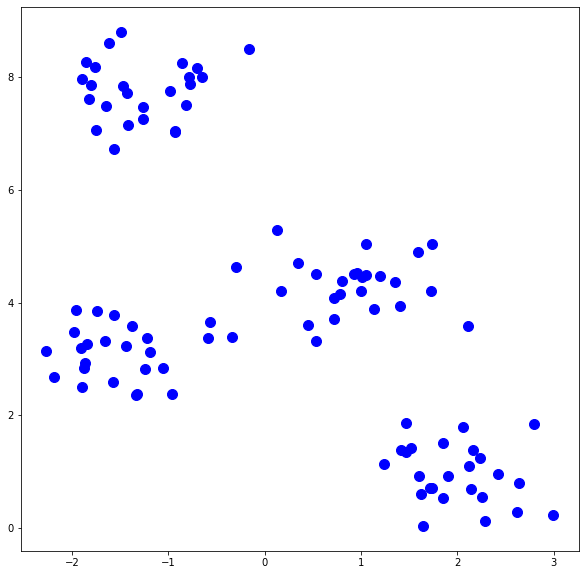

In [5]:
def plot_dataset(X):
    plt.plot(X[:, 0], X[:, 1], 'bo', ms =10)
plt.figure(figsize=(10, 10))
plot_dataset(X)
plt.show()

### 学習
K-meansの学習に必要な要素を順番に作成していきます。

## 【問題1】中心点の初期値を決める
入力されたデータから $K$ 個の中心点 $μ_1$ から $μ_K$ の初期値を決めるコードを作成してください。$K$ は指定したクラスタ数です。

最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに $K$ 個選ぶことです。今回はこれを実装してください。

K-meansの学習結果は中心点 $μ$ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

#### 参考サイト

- https://algorithm.joho.info/programming/python/numpy-random-choice/

In [834]:
# n_clusters =4
# def fir_val(X):
#     center_points =[X[np.random.choice(X.shape[0], n_clusters, replace =False)]]
#     return center_points
# fir_val(X)

In [88]:
n_clusters = 4
clusters = np.random.randint(0, n_clusters, X.shape[0])
np.unique(clusters, return_counts=True)

(array([0, 1, 2, 3]), array([24, 25, 28, 23]))

In [89]:
def centring(X):
    n_clusters = 4
    clusters = np.random.randint(0, n_clusters, X.shape[0])
    #0,1,2,3のラベルに対して紐付けられたXの特徴量毎に平均値を出している
    centroids = np.array([X[clusters == n, :].mean(axis = 0) for n in range(n_clusters)])
    return centroids
centring(X)

array([[ 0.4404694 ,  3.78173818],
       [ 0.32278404,  3.4092396 ],
       [ 0.00909474,  3.97940105],
       [-0.57006697,  5.08778604]])

## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。

K-meansはこのSSEを最小化する $r_{nk}$ と $μ_k$ を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE=\sum^{N}_{n=1}\sum^{K}_{k=1}r_{nk} ∥X_n−μ_k∥^2
$$

$n$ : データ点のインデックス

$k$ : クラスタのインデックス

$X_n$ : $n$番目のデータ点

$μ_k$ : $k$番目の中心点

$r_{nk}$ : データ点$X_n$がクラスタ $k$ に所属していたら1、そうでなければ0

### クラスタの割り当てと中心点の移動を繰り返す
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。

- 中心点 $μ_k$ を固定した上で SSE を最小化する クラスタの割り当て $r_{nk}$ を選ぶ。
- クラスタの割り当て $r_{nk}$ を固定した上で SSE を最小化する 中心点 $μ_k$ を選ぶ。

最初の中心点 $μ_k$ は問題1で作成した初期値です。


順番に見ていきます。

#### 参考サイト
- https://qiita.com/panda531/items/4b5504a3949eacb7ab19
- https://qiita.com/navitime_tech/items/bb1bd01537bc2713444a

### ①サンプル数のインデックスに対し、kクラス分の初期ラベルを生成している

In [104]:
n_clusters = 4
clusters = np.random.randint(0, n_clusters, X.shape[0])

### ②サンプル数のインデックスに対し、kクラス分のランダムな初期ラベルを割り当てる
### ③各ラベル毎にデータ点をグルーピングし、クラスタを作成する
### ④クラスタ毎にデータ点の平均値を求め、そのクラスタの重心とする

In [94]:
def gra_cent(X):
    #②、④を同時進行で行っている。③は②の時点で済んでいると思われる。要確認。
    centroids = np.array([X[clusters == n, :].mean(axis = 0) for n in range(n_clusters)])
    return centroids
gra_cent(X)

array([[-1.47935679,  3.11716896],
       [ 0.92578447,  4.32475792],
       [-1.26811733,  7.76378266],
       [ 1.99186903,  0.96561071]])

In [95]:
for c in gra_cent(X):
    np.array((X-c)**2)

In [380]:
#⑤その重心から、すべてのサンプルのデータ点との距離を計算する
# def som_error():
#     for c in gra_cent(X):
#         sse=np.array((X-c)**2)
# som_error()

## 【問題3】クラスタへの割り当て
全てのデータ点 $X_n$ を最も近い中心点 $μ_k$ に割り当てるコードを作成してください。

K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル $p,q$ に対しては以下の数式で表現できます。

$$
∥q−p∥=\sqrt{(q−p)⋅(q−p)}
$$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual(下記URL)

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html


中心点 $μ_k$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

### ⑤その重心から、すべてのサンプルのデータ点との距離を計算する
### ⑥各データ点から見て、距離が最小となる重心のクラスタにそのデータ点を割り当てる


In [108]:
def som_error():
    new_clusters = np.array([np.linalg.norm(X-c, axis =1) for c in gra_cent(X)]).argmin(axis =0)
    return new_clusters
som_error()

array([3, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 1, 1, 3, 3, 2,
       1, 3, 0, 1, 1, 0, 3, 3, 3, 2, 3, 3, 1, 3, 2, 3, 2, 1, 0, 1, 2, 1,
       1, 2, 3, 1, 0, 3, 2, 3, 1, 1, 1, 2, 2, 3, 3, 2, 2, 3, 3, 0, 3, 2,
       1, 1, 3, 0, 2, 3, 0, 2, 0, 3, 1, 1, 3, 3, 3, 2, 1, 0, 3, 1, 3, 3,
       3, 0, 0, 1, 3, 1, 1, 2, 2, 1, 2, 2])

#### 戦いの軌跡

In [298]:
x = np.random.randint(1, 15, 20).reshape(-1, 2)
y = np.random.randint(0, 10, 8).reshape(-1, 2)
print(x)
print(y)

ist = []
for c in y:
        a = np.array(np.linalg.norm(x-c, axis=1))
        print(np.array(list.append(a)).argmin(axis=0))
        

[[ 6  4]
 [11  5]
 [ 1  6]
 [12 12]
 [ 9  9]
 [ 8 12]
 [ 9  4]
 [14 11]
 [ 8 10]
 [ 4  1]]
[[9 4]
 [9 5]
 [0 5]
 [0 7]]


In [18]:
# ⑥各データ点から見て、距離が最小となる重心のクラスタにそのデータ点を割り当てる
# def som_error():
#     l = []
#     for c in gra_cent(X):
#         sse=np.linalg.norm((X-c)**2, axis =1).reshape(-1, 1)
#         l.append(sse)
#     sse_l = np.concatenate([l[0], l[1], l[2], l[3]], 1)
#     return sse_l.argmin(axis=1)
# som_error()

## 【問題4】中心点の移動
中心点 $μ_k$ を $k$ 番目のクラスタに割り当てられる全てのデータ点 $X_n$ の平均値（重心）に移動するコードを作成してください。

クラスタの割り当て $r_{nk}$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [400]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [401]:
n_clusters = 4
clusters = np.random.randint(0, n_clusters, X.shape[0])

In [402]:
gra_cent = np.array([X[clusters == n, :].mean(axis = 0) for n in range(n_clusters)])
new_clusters = np.array([np.linalg.norm(X-c, axis =1) for c in gra_cent]).argmin(axis =0)
new_gra_cent = np.array([X[new_clusters ==n, :].mean(axis =0) for n in range(n_clusters)])

new_gra_cent

array([[ 0.55323252,  3.99226226],
       [-1.62121428,  3.20253738],
       [ 1.60829315,  1.51995041],
       [-0.62445727,  6.83775028]])

## 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


- 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
- 中心点 $μ_k$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

#### ⑦繰り返し
#### ⑧収束条件（定義した反復回数に達した）を満たしたら、終了

In [646]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
n_clusters = 4
clusters = np.random.randint(0, n_clusters, X.shape[0])

In [643]:
max_iter =30
for i in range(max_iter):
    print(i)
    new_gra_cent = np.array([X[clusters ==n, :].mean(axis =0) for n in range(n_clusters)])
    new_clusters = np.array([np.linalg.norm(X-c, axis =1) for c in new_gra_cent]).argmin(axis =0)
    if np.all(clusters == new_clusters):
        break
    clusters = new_clusters
print(new_gra_cent)

0
1
2
[[ 0.92578447  4.32475792]
 [-1.26811733  7.76378266]
 [-1.47935679  3.11716896]
 [ 1.99186903  0.96561071]]


In [672]:
# max_iter =30
# tol = 1e-5
# for i in range(max_iter):
#     print(i)
#     gra_cent = np.array([X[clusters ==n, :].mean(axis =0) for n in range(n_clusters)])
#     new_clusters = np.array([np.linalg.norm(X-c, axis =1) for c in gra_cent]).argmin(axis =0)
#     new_gra_cent = np.array([X[new_clusters ==n, :].mean(axis =0) for n in range(n_clusters)])
#     if np.sum(gra_cent-new_gra_cent) < tol:
#         break
#     clusters = new_clusters
# print(new_gra_cent)

In [254]:
# max_iter =10
# for _ in range(max_iter):
#     new_gra_cent = np.array([X[clusters ==n, :].mean(axis =0) for n in range(n_clusters)])
#     new_clusters = np.array([np.linalg.norm(X-c, axis =1) for c in new_gra_cent]).argmin(axis =0)
#     for n in range(n_clusters):
#             if not np.any(new_clusters == n):
#                 new_gra_cent[n] = X[random.choice(X.shape[0], 1), :]
#     clusters = new_clusters
#     if np.allclose(new_clusters, clusters):
#         break
# print(clusters)

In [ ]:
#X[np.random.choice(X.shape[0], 1)]

## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 $μ_k$ を保持しておきます。

#### ⑨初期値を変更し、上記を繰り返し、SSEが最小のものを選ぶ

In [91]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
n_clusters =4
n_init =20
max_iter =10
sse =0
min_sse = 1e+10

In [92]:
for n in range(n_init):
    clusters = np.random.randint(0, n_clusters, X.shape[0])
    for i in range(max_iter):
        sse = np.zeros(n_clusters)
        
        new_gra_cent = np.array([X[clusters ==n, :].mean(axis =0) for n in range(n_clusters)])
        new_clusters = np.array([np.linalg.norm(X-c, axis =1) for c in new_gra_cent]).argmin(axis =0)
        
        sse = [np.sum((X[new_clusters ==n, :]-new_gra_cent[n])**2) for n in range(n_clusters)]
        sse = np.sum(sse)
        
        if sse == 0 or sse < min_sse :
            min_sse = sse
            new_gra_cent = new_gra_cent
            
        if np.all(new_clusters == clusters):
            break
        clusters = new_clusters

print(min_sse, new_gra_cent)

48.63378320706402 [[-1.47935679  3.11716896]
 [ 0.92578447  4.32475792]
 [-1.26811733  7.76378266]
 [ 1.99186903  0.96561071]]


In [673]:
# n_clusters =4
# n_init =10
# max_iter =20
# min_sse =1e+10
# for n in range(n_init):
#     clusters = np.random.randint(0, n_clusters, X.shape[0])
#     for _ in range(max_iter):
#         sse = np.zeros(n_clusters)
#         gra_cent = np.array([X[clusters ==n, :].mean(axis =0) for n in range(n_clusters)])
#         print(gra_cent)
#         new_clusters = np.array([np.linalg.norm(X-c, axis =1) for c in gra_cent]).argmin(axis =0)
#         sse = [np.sum((X[new_clusters ==n, :]-new_gra_cent[n])**2) for n in range(n_clusters)]
#         sse = np.sum(sse)
#         if sse < min_sse:
#             min_sse = sse
#             gra_cent = gra_cent
#         new_gra_cent = np.array([X[new_clusters ==n, :].mean(axis =0) for n in range(n_clusters)])
#         if np.sum(gra_cent-new_gra_cent) < tol:
#             break
#         clusters = new_clusters

# print(min_sse, gra_cent)

## 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


- データ点 $X_n$ と学習で決まった中心点 $μ_k$ に対し、 SSE を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。


- データ点 $X_n$ を最も近い $μ_k$ に割り当てる。


In [114]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
n_clusters =4
n_init =20
max_iter =10
sse =0

In [115]:
for n in range(n_init):
    clusters = np.random.randint(0, n_clusters, X.shape[0])
    for i in range(max_iter):
        sse = np.zeros(n_clusters)
        
        new_gra_cent = np.array([X[clusters ==n, :].mean(axis =0) for n in range(n_clusters)])
        new_clusters = np.array([np.linalg.norm(X-c, axis =1) for c in new_gra_cent]).argmin(axis =0)
        
        sse = [np.sum((X[new_clusters ==n, :]-new_gra_cent[n])**2) for n in range(n_clusters)]
        sse = np.sum(sse)
        
        if sse == 0 or sse < min_sse :
            min_sse = sse
            gra_cent = gra_cent
            new_clusters = new_clusters
            
        if np.all(new_clusters == clusters):
            break
        clusters = new_clusters

best_clusters = np.hstack([X, new_clusters[:, np.newaxis]])

## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 $k$ は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 $k$ を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 $k$ を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [195]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100
                                , n_features=2
                                , centers=4
                               , cluster_std=0.5
                               , shuffle=True
                                , random_state=0)

In [196]:
from sklearn.model_selection import train_test_split
X_train, X_test = \
train_test_split(X,train_size=0.8,random_state=None)

print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


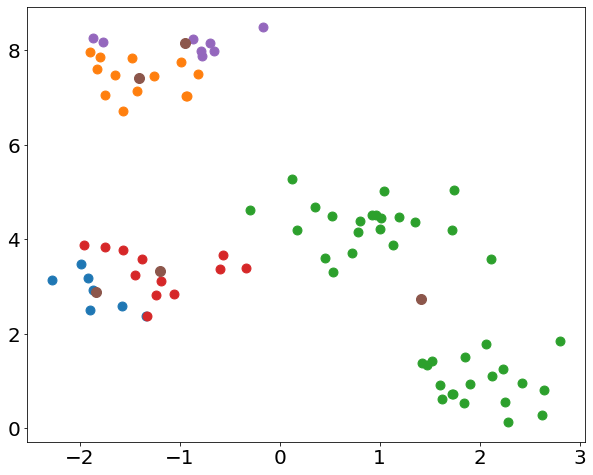

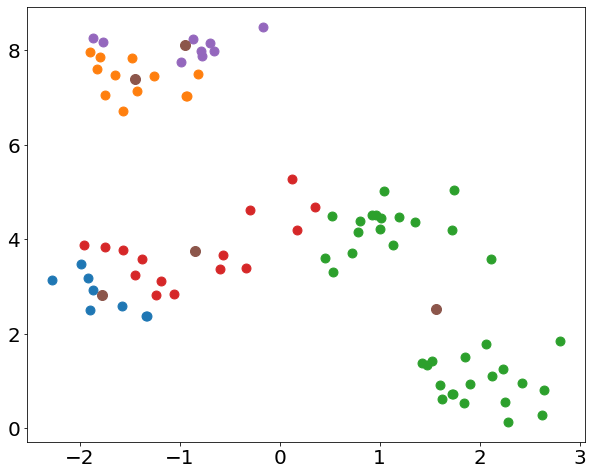

[2 0 2 2 1 0 3 4 2 0 2 2 4 2 0 0 1 2 2 3]


In [199]:
clf = ScratchKMeansbymasukazu_speed_featmisaki(n_clusters =5, n_init=100, max_iter=1000, tol=1e-5, verbose=True)
clf.fit(X_train)
pred = clf.predict(X_test)
print(pred)

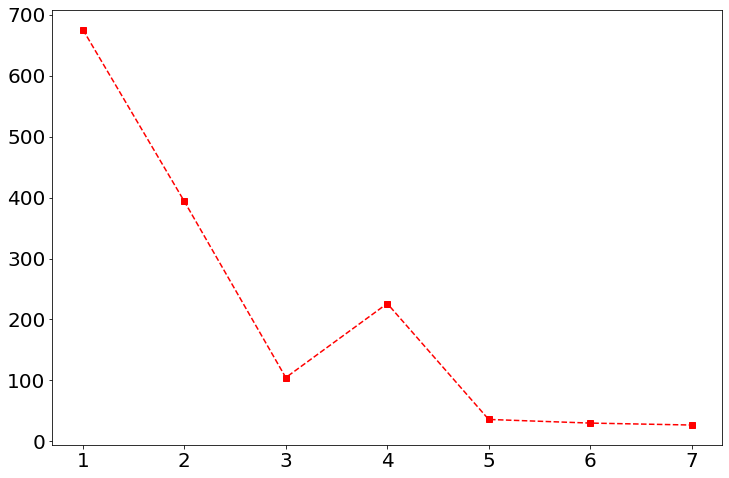

In [200]:
elbow ={}
for k in range(1, 8):
    model = ScratchKMeansbymasukazu_speed_featmisaki(n_clusters =k, n_init=100, max_iter=1000, tol=1e-5, verbose=False)
    model.fit(X_train)
    elbow[k] = model.best_sse

fig = plt.subplots(figsize =(12, 8))
plt.rcParams["font.size"] =20
plt.plot(elbow.keys(), elbow.values(), 'rs--');

### 自分で書いている未完成のもの

In [816]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
# n_init =10
# max_iter =10
# sse =0

In [80]:
for j in range(1, 11):
    clusters = np.random.randint(0, j+1, X.shape[0])
    for i in range(max_iter):
        for n_clusters in range(j+1):
    
            new_gra_cent = np.array([X[clusters ==n, :].mean(axis =0) for n in range(n_clusters)])
            print(new_gra_cent)
            new_clusters = np.array([np.linalg.norm(X-c, axis =1) for c in new_gra_cent]).argmin(axis =0)
            
            sse = np.zeros(n_clusters+1)                        
            sse = [np.sum((X[new_clusters ==n, :]-new_gra_cent[n])**2) for n in range(n_clusters)]
            sse = np.sum(sse)

            if sse == 0 or sse < min_sse :
                min_sse = sse
                gra_cent = gra_cent
                new_clusters = new_clusters

            if np.all(new_clusters == clusters):
                break
            clusters = new_clusters

best_clusters = np.hstack([X, new_clusters[:, np.newaxis]])
print(best_clusters)

## 【問題9】（アドバンス課題）シルエット図
$k$ を決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。


Matplotlibを使い図を表示するコードは用意しました。以下を与えてください。


silhouette_vals : shape(n_samples,)のndarray、各データ点のシルエット係数


silhouette_avg : float、シルエット係数の平均値


y_km : shape(n_samples,)のndarray、各データ点のクラスタラベル名


cluster_labels : list、クラスタのラベル名のリスト


n_clusters : int、クラスタ数


$n$ 番目のデータ点に対するシルエット係数 $s_n$ は以下の数式でを求められます。この数式を実装し、シルエット図を確認してください。

$$
s_n=\frac{b_n−a_n}{max(b_n,a_n)}
$$

$a_n$ : 凝集度。同じクラスタ内の他のデータ点との距離の平均値。


$b_n$ : 乖離度。最も近い他のクラスタ内の全てのデータ点との距離の平均値。


乖離度 $b$ が大きく、凝集度 $a$ が小さい時が理想的であり、シルエット係数 $s$ は1に近くなります。


**《シルエット図を表示するためのコード》**

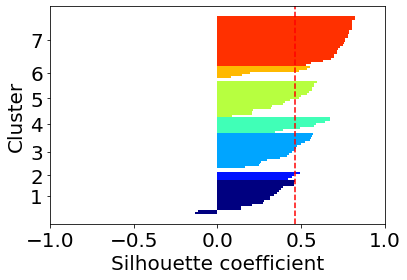

In [149]:
from matplotlib import cm

plt.rcParams["font.size"] =20

for k in range(2, 8):
    model = ScratchKMeansbymasukazu_speed(n_clusters=k, n_init=100, max_iter =1000, tol =1e-5)
    model.fit(X)
    
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(model.cluster_labels):
    c_silhouette_vals = model.silhouette_vals[model.y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / model.n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
plt.axvline(model.silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, model.cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.xlim(-1, 1)
plt.show()

## 3.クラスタ分析

### 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。


UCI Machine Learning Repository: Wholesale customers Data Set(下記URL)

https://archive.ics.uci.edu/ml/datasets/Wholesale+customers


Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。


### 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [118]:
# 《PCAのサンプルコード》

# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# pca = pca.fit(data)
# data_pca = pca.transform(data)

In [52]:
#クラスタ分析　ライブラリーインポート
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import warnings

In [159]:
data = pd.read_csv("Wholesale customers data.csv")
data = pd.DataFrame(data)

In [68]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [60]:
data.info

<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4

In [61]:
data.describe

<bound method NDFrame.describe of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  

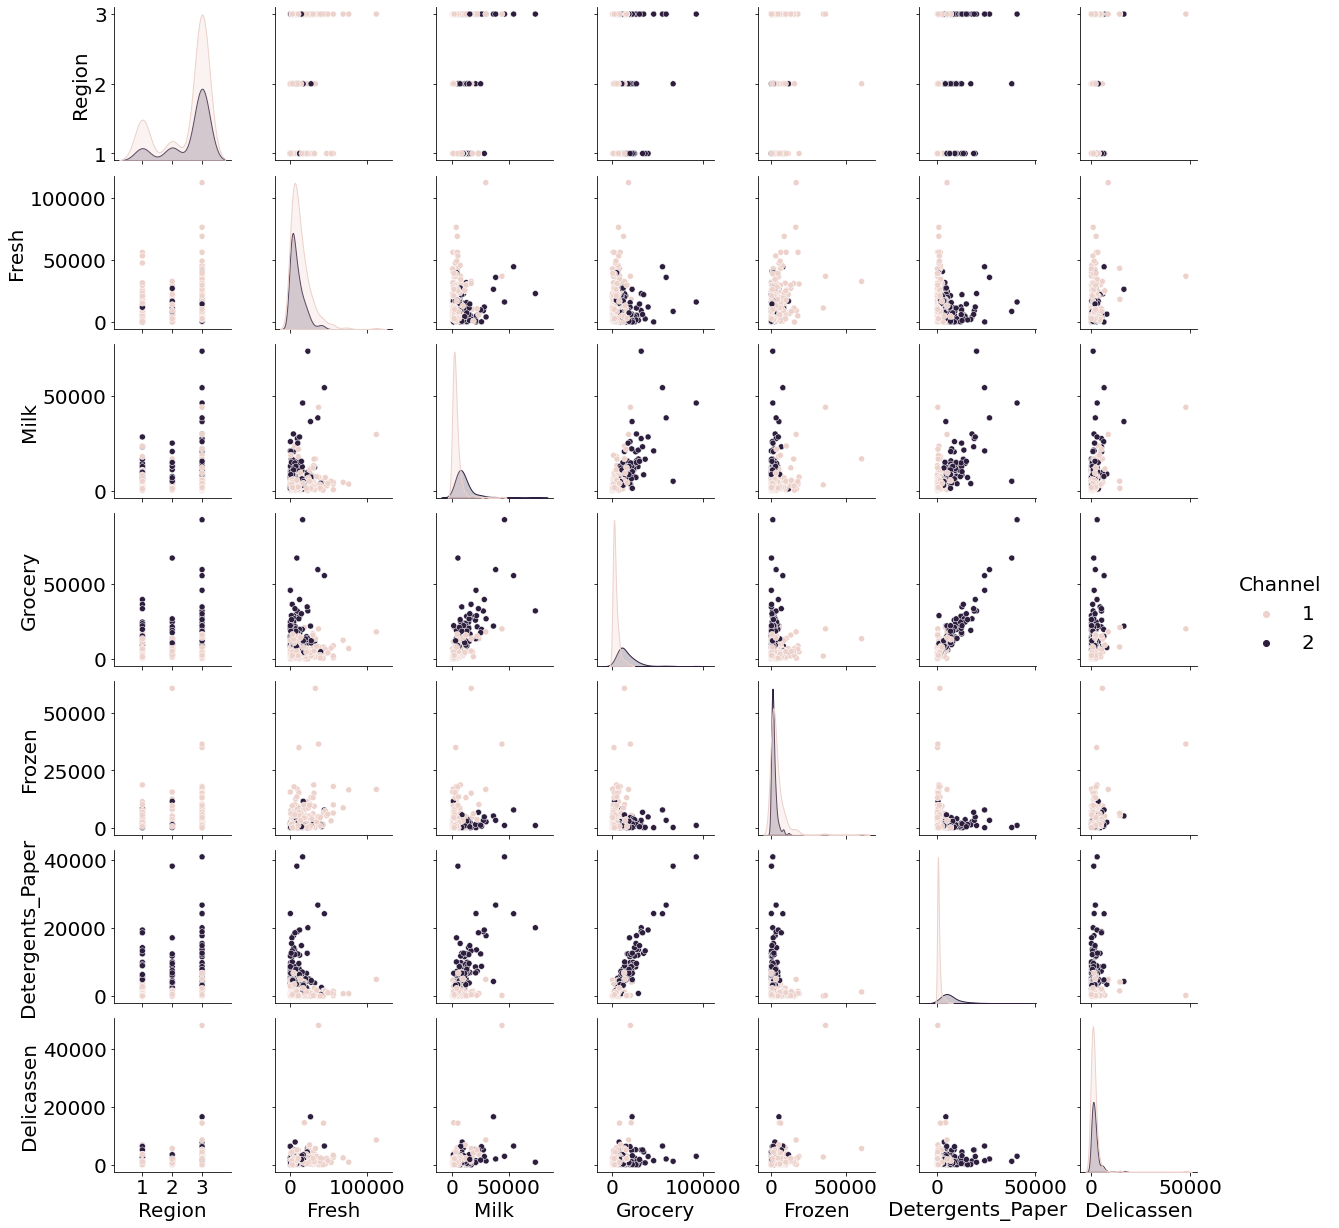

In [69]:
sns.pairplot(data, hue='Channel')

In [70]:
data.groupby(['Channel', 'Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1          59    59       59      59                59          59
        2          28    28       28      28                28          28
        3         211   211      211     211               211         211
2       1          18    18       18      18                18          18
        2          19    19       19      19                19          19
        3         105   105      105     105               105         105

In [71]:
data.groupby(['Region']).mean()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,1.233766,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104
2,1.404255,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128
3,1.332278,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266


In [72]:
data.groupby(['Channel']).mean()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620


**《PCAの分散説明率を表示するコードサンプル》**

In [119]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

## 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 $k$ を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

In [74]:
data_c = data.iloc[:, 2:7]
data_c

,Fresh,Milk,Grocery,Frozen,Detergents_Paper
0,12669,9656,7561,214,2674
1,7057,9810,9568,1762,3293
2,6353,8808,7684,2405,3516
3,13265,1196,4221,6404,507
4,22615,5410,7198,3915,1777
...,...,...,...,...,...
435,29703,12051,16027,13135,182
436,39228,1431,764,4510,93
437,14531,15488,30243,437,14841
438,10290,1981,2232,1038,168


In [75]:
data_log = data_c.apply(np.log1p)

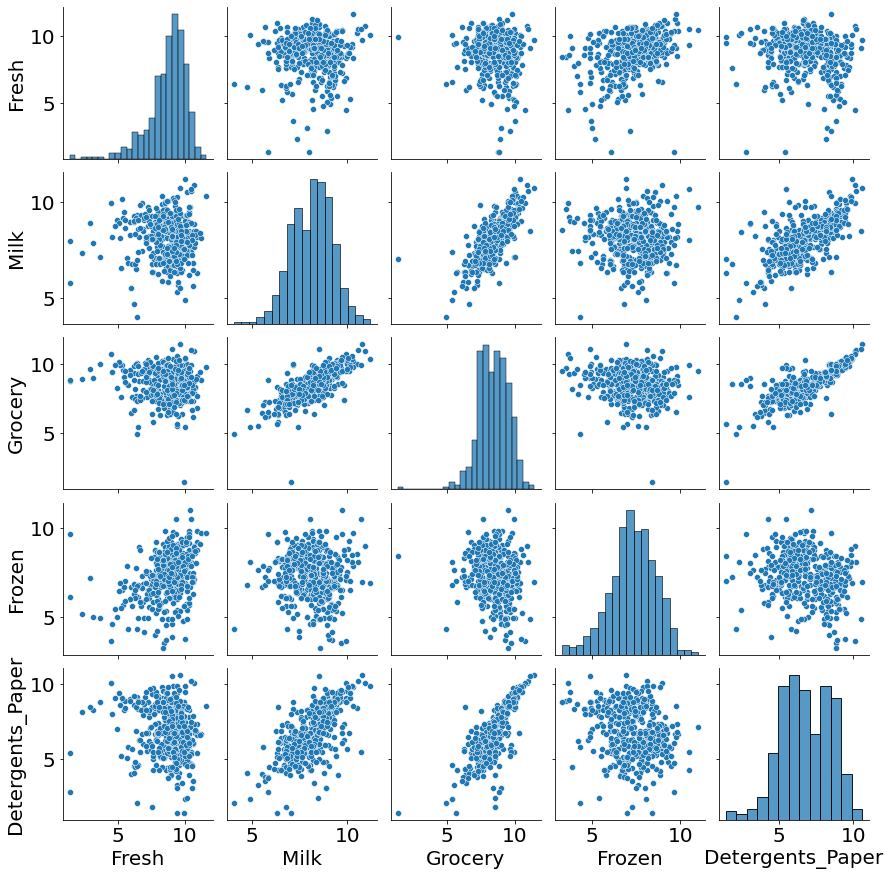

In [76]:
sns.pairplot(data_log);

[0.51817458 0.79198904 0.91505809 0.9729018 ]


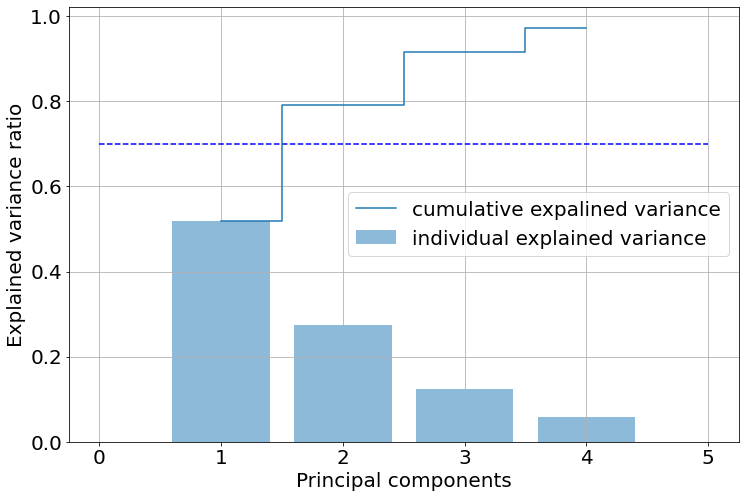

In [77]:
n =4

pca = PCA(n_components=n)
pca = pca.fit(data_log)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

fig = plt.subplots(figsize =(12, 8))
plt.bar(range(1,n+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,n+1), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, n+1,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

### - 主成分軸２つで、約80％のデータ説明の寄与率となっている

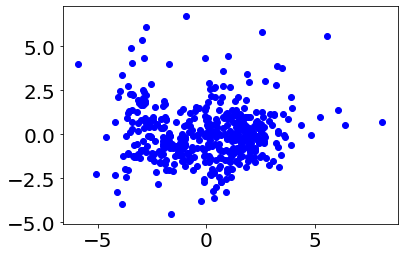

In [184]:
pca = PCA(n_components =2)
pca = pca.fit(data_log)
data_pca = pca.transform(data_log)
plt.plot(data_pca[:, 0], data_pca[:, 1], 'bo');

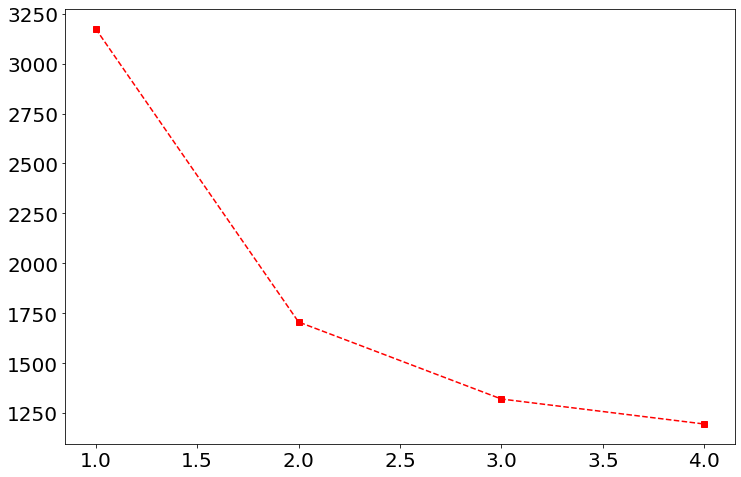

In [185]:
elbow = {}
for k in range(1, 5):
    model = ScratchKMeansbymasukazu_speed_featmisaki(n_clusters =k, n_init=100, max_iter=1000, tol=1e-5, verbose=False)
    model.fit(data_pca)
    elbow[k] = model.best_sse
    
fig = plt.subplots(figsize =(12, 8))
plt.rcParams["font.size"] =20
plt.plot(elbow.keys(), elbow.values(), 'rs--');

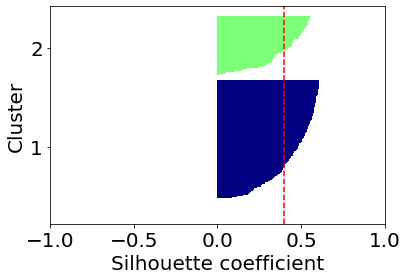

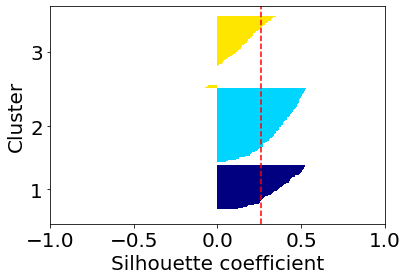

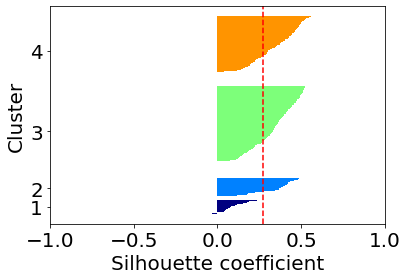

In [150]:
# シルエット図を可視化

plt.rcParams["font.size"] = 20

for k in range(2,5):
    model = ScratchKMeansbymasukazu_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5)
    model.fit(data_pca)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(model.cluster_labels):
        c_silhouette_vals = model.silhouette_vals[model.y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / model.n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    
    plt.axvline(model.silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, model.cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.xlim(-1,1)
    plt.show()

### クラスタ数の選択

- エルボー法→３が良さそう

In [175]:
model= ScratchKMeansbymasukazu_speed_featmisaki(n_clusters =3, n_init=100, max_iter=1000, tol=1e-5)
model.fit(data_pca)

In [164]:
cluster = model.y_km

data["Cluster"] =cluster

In [176]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,0


In [177]:
data_pca_label_ = np.concatenate([data_pca, cluster.reshape(-1, 1)], axis =1)
data_pca_label_

array([[-1.6933576 , -0.05905416,  1.        ],
       [-1.65123599, -0.76059128,  0.        ],
       [-1.51792715, -0.79642891,  0.        ],
       ...,
       [-3.60228374, -1.14311892,  1.        ],
       [ 1.8106657 ,  0.30024815,  0.        ],
       [ 0.18304615,  2.59817873,  1.        ]])

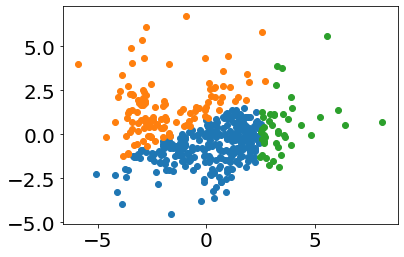

In [178]:
for i in range(model.n_clusters):
    plt.scatter(data_pca_label_[cluster==i, 0], data_pca_label_[cluster==i, 1]);

## 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

/Users/misakiryo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


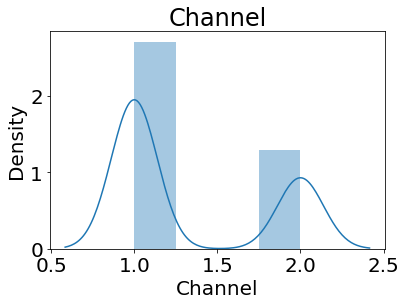

In [168]:
feature = 'Channel'

fig = plt.figure()
ax = fig.add_subplot()
ax = sns.distplot(data[feature])

plt.title(feature);

/Users/misakiryo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


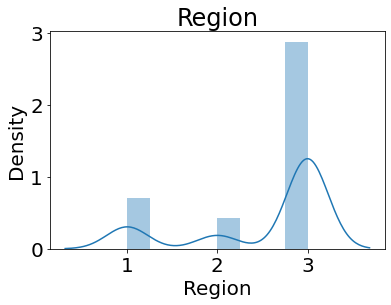

In [169]:
feature = 'Region'

fig = plt.figure()
ax = fig.add_subplot()
ax = sns.distplot(data[feature])

plt.title(feature);

/Users/misakiryo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


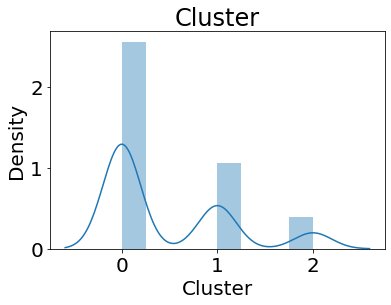

In [170]:
feature = 'Cluster'

fig = plt.figure()
ax = fig.add_subplot()
ax = sns.distplot(data[feature])

plt.title(feature);

## 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。


**《ヒント》**


前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。


条件ごとにデータを見る際にはPandasのgroupbyが便利です。


pandas.DataFrame.groupby — pandas 0.23.4 documentation(下記URL)

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

In [171]:
data.groupby(['Channel','Region','Cluster']).agg(['mean','max','min'])

Fresh                        Milk               \
                                mean     max   min          mean    max   min   
Channel Region Cluster                                                          
1       1      0        15836.179487   56083  2083   4070.897436  23527   659   
               1         2116.800000    5396   514   6024.500000  10765   577   
               2        12245.400000   31614  1956    933.200000   3838   258   
        2      0        14324.681818   32717  2617   2465.863636  16784   713   
               1          789.000000    1774     3   1779.000000   3696   333   
               2         7127.000000    7127  7127   1375.000000   1375  1375   
        3      0        16249.791667  112151   759   3882.430556  43950   521   
               1         2061.628571    8607     3   3520.285714   8847   727   
               2        16129.437500   56159   403   1671.031250   7330    55   
2       1      0         9044.500000   20782  2790  12698.500000  28326  2527   
               1         2124.400000    5550    18   9252.400000  16599  4737   
        2      0        11992.666667   27082  5283   9764.666667  25071   928   
               1         3057.200000    8565   161   8674.300000  20655  1897   
        3      0        14901.796610   44466  2932  11714.627119  73498  1124   
               1         3328.304348   22039    23  10040.065217  29892  1275   

                             Grocery                    Frozen               \
                                mean    max   min         mean    max   min   
Channel Region Cluster                                                        
1       1      0         4208.794872  16966   950  3786.666667  18711   327   
               1         5850.800000  15538   572  1019.500000   1859    91   
               2         1489.100000   5226   489  2663.700000   6818   784   
        2      0         4624.272727  13626  1330  6382.318182  60869   416   
               1         3827.800000   7021  1664  3554.200000  15601   264   
               2         2201.000000   2201  2201  2679.000000   2679  2679   
        3      0         4008.326389  21042   534  4197.590278  36534   118   
               1         5453.400000  16483   223   697.714286   7530    25   
               2         1626.031250   8253     3  4460.406250  35009    75   
2       1      0        20131.750000  39694  5265  4466.625000   8321  1069   
               1        17144.100000  36486  6089  1078.100000   2946    61   
        2      0        13699.666667  26839  2743  2460.888889  11559   824   
               1        18690.300000  67298  5234   712.300000   1465   131   
        3      0        14962.881356  92780  4523  2159.644068   8132   201   
               1        17224.782609  45828  6981   684.065217   2693    33   

                       Detergents_Paper                Delicassen               
                                   mean    max   min         mean    max   min  
Channel Region Cluster                                                          
1       1      0             740.769231   3593   130  1483.820513   6854    56  
               1            2633.700000   5828    93   670.100000   2388     7  
               2              85.400000    333     5   606.200000   1328   130  
        2      0             542.909091   1679   140  1186.545455   5609    51  
               1             297.800000    821    15   760.400000   1637   259  
               2              83.000000     83    83  1059.000000   1059  1059  
        3      0             767.916667   5079    51  1829.687500  47943     3  
               1            1516.885714   6907    68   795.685714   2501     3  
               2              72.468750    283     3   907.312500   2916     3  
2       1      0            9110.375000  19410   788  2018.875000   5121   698  
               1            7517.200000  13308  4314  1754.400000   6372   120  
        2      

/Users/misakiryo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


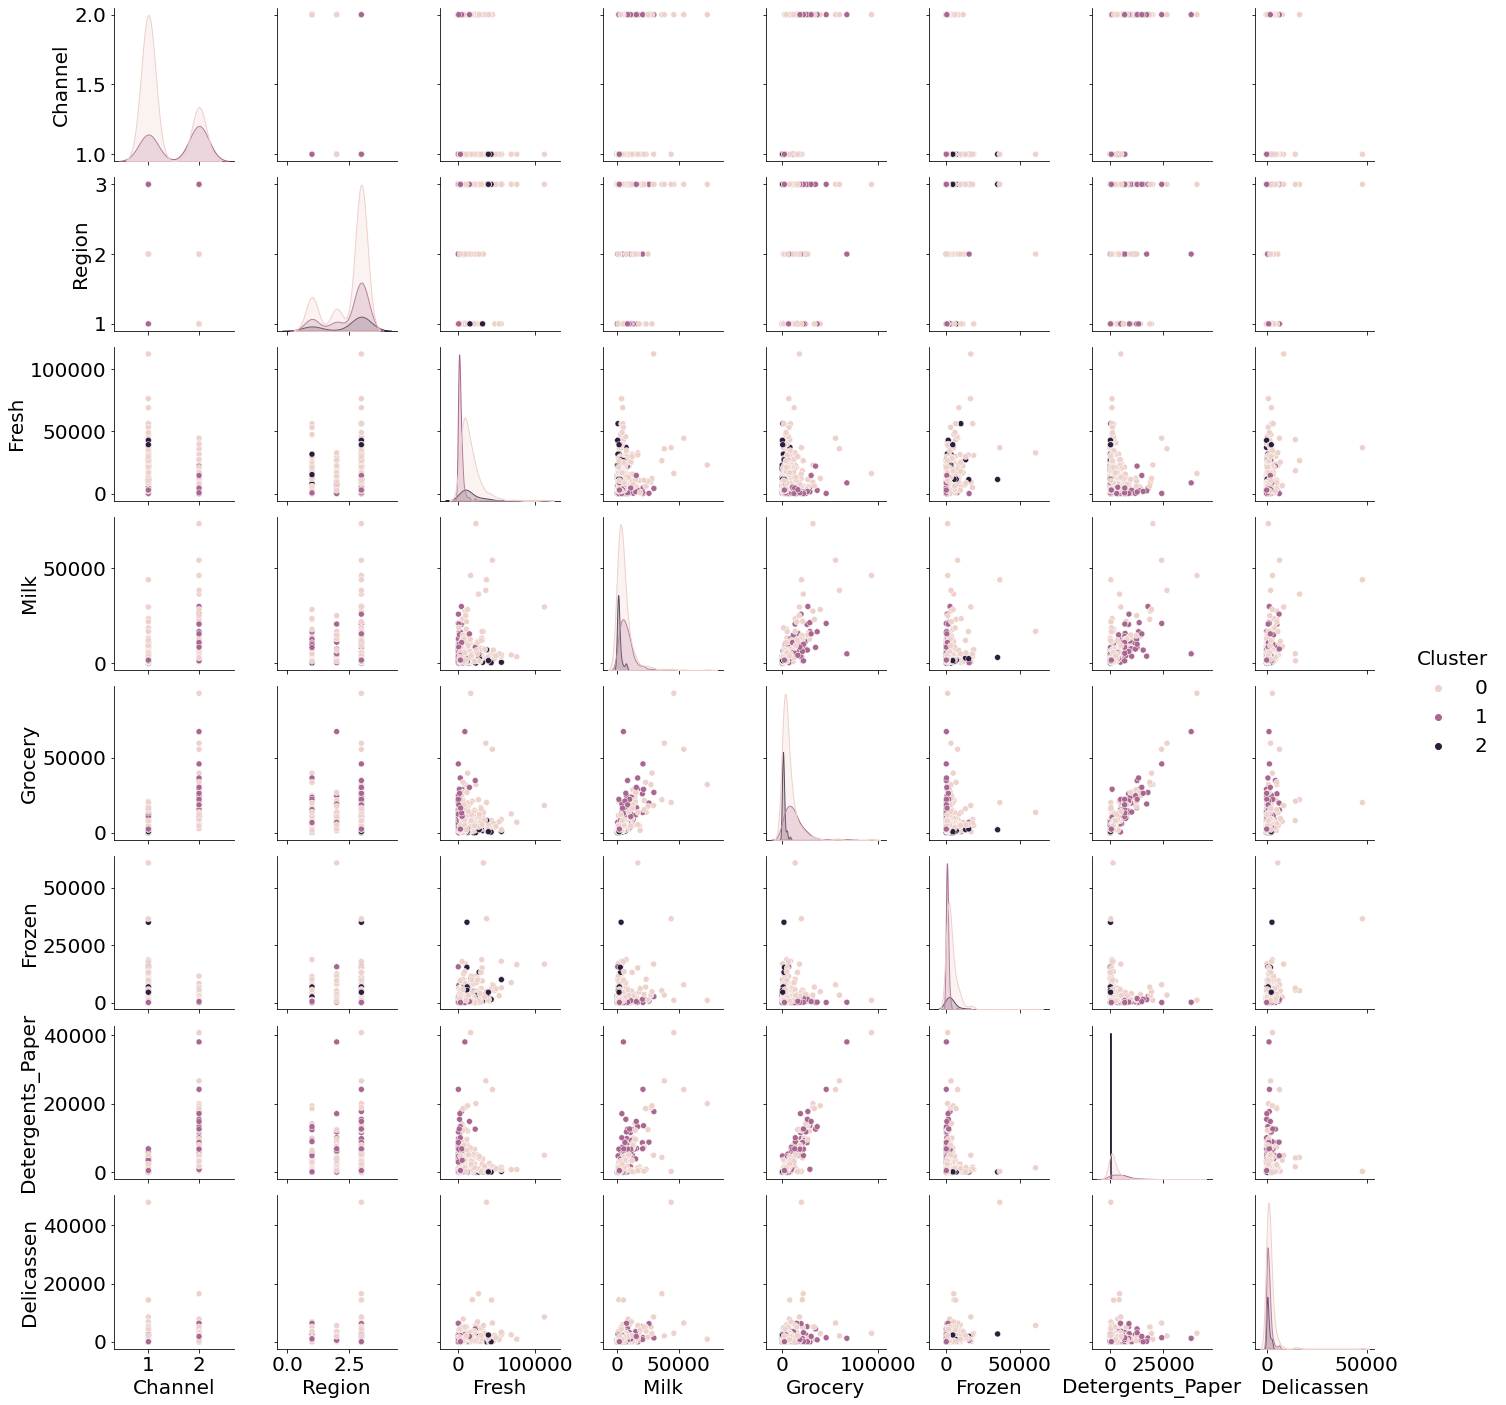

In [172]:
sns.pairplot(data, hue='Cluster')

## 4.他の非階層クラスタリング手法

## 【問題13】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては **DBSCAN** 、
PCA以外に次元削減手法で有名な手法としては **t-SNE** や **LLE** があります。


- DBSCANのメリット・デメリット
- t-SNE、LLEのメリット・デメリット

について記述してください。



## 【問題14】（アドバンス課題）t-SNEとDBSCANの利用
Wholesale customersのデータに対して、PCAではなく、 **t-SNE** を用いて次元削減をしてください。さらにK-meansではなく、 **DBSCAN** を用いてクラスタリングしてください。


そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。


sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation(下記URL)
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation(下記URL)
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html


**《パラメーターチューニング》**


これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。


t-SNEの論文(下記URL)
http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf


DBSCANの論文(下記URL)

https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf